# Exploring Poverty Worldwide


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

mpl.style.use('ggplot')
%matplotlib inline

# All Countries of the World with region designations
# All Country's populations

In [4]:
country_df = pd.read_csv("country_regions.csv")
populations_df = pd.read_csv("data_population/population_total.csv")

In [12]:
#country_df.drop(columns=['World bank, 3 income groups 2017'], inplace=True)

In [13]:
#country_df.drop(columns=['UN member since','members_oecd_g77','geo','World bank region','World bank, 4 income groups 2017'], inplace=True)

In [5]:
country_df.rename(columns={'name':'country'}, inplace=True)

In [6]:
country_df.head(5)

,geo,country,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,19/11/1946,South Asia,Low income,NaN
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,14/12/1955,Europe & Central Asia,Upper middle income,NaN
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,8/10/1962,Middle East & North Africa,Upper middle income,NaN
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,28/7/1993,Europe & Central Asia,High income,NaN
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1/12/1976,Sub-Saharan Africa,Lower middle income,NaN


# Economic Data - Poverty percentages, 1.90/day, 3.20/day, & 5.50/day

In [7]:
poverty190 = pd.read_csv("data_income/poverty_percent_below_190_a_day.csv")
poverty320 = pd.read_csv("data_income/poverty_percent_below_320_a_day.csv")
poverty550 = pd.read_csv("data_income/poverty_percent_below_550_a_day.csv")

In [8]:
poverty190.head(5)

,country,1967,1968,1969,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.011,NaN,0.019,0.013,0.011,0.017,NaN
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.025,0.022,0.009,0.008,0.007,0.007,NaN,0.007,0.005,0.010
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.019,0.019,0.022,0.016,0.022,0.023,0.019,0.018,0.014,0.021


## Merge country data with Poverty data to categorize countries into Regions


In [9]:
poverty190 = pd.merge(country_df,poverty190,on='country')
poverty320 = pd.merge(country_df,poverty320,on='country')
poverty550 = pd.merge(country_df,poverty550,on='country')

In [9]:
poverty190.head()

,country,four_regions,eight_regions,six_regions,Latitude,Longitude,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Albania,europe,europe_east,europe_central_asia,41.00,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.011,NaN,0.019,0.013,0.011,0.017,NaN
1,Algeria,africa,africa_north,middle_east_north_africa,28.00,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,africa,africa_sub_saharan,sub_saharan_africa,-12.50,18.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476
3,Argentina,americas,america_south,america,-34.00,-64.0,NaN,NaN,NaN,NaN,...,0.025,0.022,0.009,0.008,0.007,0.007,NaN,0.007,0.005,0.010
4,Armenia,europe,europe_east,europe_central_asia,40.25,45.0,NaN,NaN,NaN,NaN,...,0.019,0.019,0.022,0.016,0.022,0.023,0.019,0.018,0.014,0.021


### Pulling out the US & Canada

In [64]:
poverty190.loc[poverty190.country == 'United States']

,country,four_regions,eight_regions,six_regions,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,2018
152,United States,americas,america_north,america,39.76,-98.5,0.01,NaN,NaN,0.01,NaN,NaN,0.012,NaN,NaN


In [65]:
poverty190.loc[poverty190.country == 'Canada']

,country,four_regions,eight_regions,six_regions,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,2018
22,Canada,americas,america_north,america,60.10867,-113.64258,0.002,NaN,NaN,0.005,NaN,NaN,NaN,NaN,NaN


### Replace NaNs with 0 for Canada & US

In [80]:
#poverty190['United States']['2011']

0      False
1      False
2      False
3      False
4      False
       ...  
158    False
159    False
160    False
161    False
162    False
Name: country, Length: 163, dtype: bool

How many values are in each year

In [10]:
poverty190.groupby('eight_regions')[['country']].count()

,country
eight_regions,
africa_north,5
africa_sub_saharan,45
america_north,15
america_south,12
asia_west,21
east_asia_pacific,22
europe_east,23
europe_west,20


In [74]:
poverty190.groupby('eight_regions')[['2010','2011','2012','2013','2014','2015','2016','2017','2018']].count()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
eight_regions,,,,,,,,,
africa_north,2,1,2,2,0,2,0,2,0
africa_sub_saharan,9,9,6,3,9,10,6,6,2
america_north,8,5,7,7,8,5,8,5,6
america_south,6,9,8,9,8,8,8,9,8
asia_west,8,6,6,4,6,5,8,4,1
east_asia_pacific,10,5,8,9,7,7,5,3,4
europe_east,18,19,21,20,21,21,20,19,7
europe_west,20,20,19,20,19,20,19,16,0


How many null values are in each year

In [79]:
poverty190.groupby('eight_regions')[['2010','2011','2012','2013','2014','2015','2016','2017','2018']].apply(lambda x: x.isna().sum())

,2010,2011,2012,2013,2014,2015,2016,2017,2018
eight_regions,,,,,,,,,
africa_north,3,4,3,3,5,3,5,3,5
africa_sub_saharan,36,36,39,42,36,35,39,39,43
america_north,7,10,8,8,7,10,7,10,9
america_south,6,3,4,3,4,4,4,3,4
asia_west,13,15,15,17,15,16,13,17,20
east_asia_pacific,12,17,14,13,15,15,17,19,18
europe_east,5,4,2,3,2,2,3,4,16
europe_west,0,0,1,0,1,0,1,4,20


In [ ]:
poverty190[poverty]

### Continuing with other poverty datasets, 3.20/day & 5.50/day

In [15]:
poverty320.head()

,country,four_regions,eight_regions,six_regions,Latitude,Longitude,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Albania,europe,europe_east,europe_central_asia,41.00,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.077,NaN,0.140,0.103,0.112,0.104,NaN
1,Algeria,africa,africa_north,middle_east_north_africa,28.00,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,africa,africa_sub_saharan,sub_saharan_africa,-12.50,18.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.698
3,Argentina,americas,america_south,america,-34.00,-64.0,NaN,NaN,NaN,NaN,...,0.057,0.053,0.024,0.027,0.023,0.026,NaN,0.024,0.024,0.030
4,Armenia,europe,europe_east,europe_central_asia,40.25,45.0,NaN,NaN,NaN,NaN,...,0.192,0.205,0.188,0.171,0.162,0.164,0.135,0.141,0.123,0.130


In [16]:
poverty550.head()

,country,four_regions,eight_regions,six_regions,Latitude,Longitude,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Albania,europe,europe_east,europe_central_asia,41.00,20.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.391,NaN,0.403,0.383,0.388,0.380,NaN
1,Algeria,africa,africa_north,middle_east_north_africa,28.00,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,africa,africa_sub_saharan,sub_saharan_africa,-12.50,18.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.872
3,Argentina,americas,america_south,america,-34.00,-64.0,NaN,NaN,NaN,NaN,...,0.133,0.127,0.088,0.084,0.082,0.089,NaN,0.085,0.077,0.096
4,Armenia,europe,europe_east,europe_central_asia,40.25,45.0,NaN,NaN,NaN,NaN,...,0.621,0.634,0.608,0.565,0.546,0.523,0.483,0.435,0.500,0.504


In [ ]:
poverty190.groupby('')

In [17]:
poverty190.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        163 non-null    object 
 1   four_regions   163 non-null    object 
 2   eight_regions  163 non-null    object 
 3   six_regions    163 non-null    object 
 4   Latitude       163 non-null    float64
 5   Longitude      163 non-null    float64
 6   1967           1 non-null      float64
 7   1968           0 non-null      float64
 8   1969           1 non-null      float64
 9   1970           0 non-null      float64
 10  1971           1 non-null      float64
 11  1972           0 non-null      float64
 12  1973           0 non-null      float64
 13  1974           2 non-null      float64
 14  1975           2 non-null      float64
 15  1976           0 non-null      float64
 16  1977           1 non-null      float64
 17  1978           1 non-null      float64
 18  1979      

## Limited data in years 1967-2009. Focusing attention on 2010 thru 2018

In [18]:
## Used this to clear columns 1967 thru 1999, & subsequently latitude & longitude
poverty190.drop(poverty190.iloc[:,6:39], axis=1, inplace=True)

In [22]:
poverty320.drop(poverty320.iloc[:,6:39], axis=1, inplace=True)
poverty550.drop(poverty550.iloc[:,6:39], axis=1, inplace=True)

In [63]:
# How many values do I have for each region?
poverty190.groupby('eight_regions')[['country']].apply(lambda x: print(x))

      country
1     Algeria
38   Djibouti
41      Egypt
97    Morocco
144   Tunisia
                      country
2                      Angola
12                      Benin
16                   Botswana
19               Burkina Faso
20                    Burundi
21                   Cameroon
23                 Cape Verde
24   Central African Republic
25                       Chad
29                    Comoros
30           Congo, Dem. Rep.
31                Congo, Rep.
33              Cote d'Ivoire
44                   Ethiopia
48                      Gabon
49                     Gambia
52                      Ghana
55                     Guinea
56              Guinea-Bissau
73                      Kenya
80                    Lesotho
81                    Liberia
84                 Madagascar
85                     Malawi
88                       Mali
90                 Mauritania
91                  Mauritius
98                 Mozambique
100                   Namibia
104             

""


In [20]:
# How many countries do I have for each region
poverty190.groupby('eight_regions')['country'].count()

eight_regions
africa_north           5
africa_sub_saharan    45
america_north         15
america_south         12
asia_west             21
east_asia_pacific     22
europe_east           23
europe_west           20
Name: country, dtype: int64

In [23]:
poverty190.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        163 non-null    object 
 1   four_regions   163 non-null    object 
 2   eight_regions  163 non-null    object 
 3   six_regions    163 non-null    object 
 4   Latitude       163 non-null    float64
 5   Longitude      163 non-null    float64
 6   2000           48 non-null     float64
 7   2001           35 non-null     float64
 8   2002           50 non-null     float64
 9   2003           55 non-null     float64
 10  2004           72 non-null     float64
 11  2005           74 non-null     float64
 12  2006           72 non-null     float64
 13  2007           71 non-null     float64
 14  2008           72 non-null     float64
 15  2009           75 non-null     float64
 16  2010           81 non-null     float64
 17  2011           74 non-null     float64
 18  2012      

### Remove years 2000-2009

In [24]:
# iloc includes bottom number but not TOP number, indicies 4 through 38, 38 is not included
poverty190.drop(poverty190.iloc[:,6:16], axis=1, inplace=True)

In [25]:
poverty190.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        163 non-null    object 
 1   four_regions   163 non-null    object 
 2   eight_regions  163 non-null    object 
 3   six_regions    163 non-null    object 
 4   Latitude       163 non-null    float64
 5   Longitude      163 non-null    float64
 6   2010           81 non-null     float64
 7   2011           74 non-null     float64
 8   2012           77 non-null     float64
 9   2013           74 non-null     float64
 10  2014           78 non-null     float64
 11  2015           78 non-null     float64
 12  2016           74 non-null     float64
 13  2017           64 non-null     float64
 14  2018           28 non-null     float64
dtypes: float64(11), object(4)
memory usage: 20.4+ KB


In [26]:
poverty320.drop(poverty320.iloc[:,6:16], axis=1, inplace=True)
poverty550.drop(poverty550.iloc[:,6:16], axis=1, inplace=True)

In [27]:
poverty320.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        163 non-null    object 
 1   four_regions   163 non-null    object 
 2   eight_regions  163 non-null    object 
 3   six_regions    163 non-null    object 
 4   Latitude       163 non-null    float64
 5   Longitude      163 non-null    float64
 6   2010           81 non-null     float64
 7   2011           74 non-null     float64
 8   2012           77 non-null     float64
 9   2013           74 non-null     float64
 10  2014           78 non-null     float64
 11  2015           78 non-null     float64
 12  2016           74 non-null     float64
 13  2017           64 non-null     float64
 14  2018           28 non-null     float64
dtypes: float64(11), object(4)
memory usage: 20.4+ KB


In [28]:
poverty550.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 162
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        163 non-null    object 
 1   four_regions   163 non-null    object 
 2   eight_regions  163 non-null    object 
 3   six_regions    163 non-null    object 
 4   Latitude       163 non-null    float64
 5   Longitude      163 non-null    float64
 6   2010           81 non-null     float64
 7   2011           74 non-null     float64
 8   2012           77 non-null     float64
 9   2013           74 non-null     float64
 10  2014           78 non-null     float64
 11  2015           78 non-null     float64
 12  2016           74 non-null     float64
 13  2017           64 non-null     float64
 14  2018           28 non-null     float64
dtypes: float64(11), object(4)
memory usage: 20.4+ KB


### Get the average percentage for each region for 2010-2018

In [30]:
pov190_2010up = poverty190.groupby('eight_regions')[['2010','2011','2012','2013','2014','2015','2016','2017','2018']].apply(lambda x: x.mean() * 100)
pov190_2010up

,2010,2011,2012,2013,2014,2015,2016,2017,2018
eight_regions,,,,,,,,,
africa_north,1.850000,0.500000,9.800000,11.850000,NaN,0.750000,NaN,10.150000,NaN
africa_sub_saharan,50.155556,43.744444,39.650000,43.233333,29.855556,29.540000,41.683333,24.666667,43.850000
america_north,4.350000,5.820000,8.585714,4.085714,5.200000,4.680000,4.175000,4.660000,3.866667
america_south,4.433333,3.866667,3.950000,2.922222,2.875000,2.925000,3.137500,2.533333,2.700000
asia_west,5.950000,5.183333,1.666667,2.375000,3.466667,2.300000,2.312500,0.825000,0.900000
east_asia_pacific,4.930000,4.380000,6.850000,6.111111,6.200000,3.028571,1.920000,2.566667,1.750000
europe_east,1.544444,1.373684,1.619048,1.575000,1.552381,1.361905,1.255000,1.157895,0.957143
europe_west,0.295000,0.345000,0.347368,0.375000,0.331579,0.390000,0.352632,0.331250,NaN


### Africa_North has missing data (NaN) in 2014,16,18. Replace with mean of all other values

In [31]:
#Use the indexing method to specifiy the row & columns to operate on, using the same data to create the
## mean values to fillna!!! 
pov190_2010up.loc['africa_north',:].fillna(pov190_2010up.loc['africa_north',:].mean(), inplace=True)

In [32]:
# Same as above cell. See 3 cells up to see the NaNs that need filling
pov190_2010up.loc['europe_west',:].fillna(pov190_2010up.loc['europe_west',:].mean(), inplace=True)

In [33]:
pov190_2010up

,2010,2011,2012,2013,2014,2015,2016,2017,2018
eight_regions,,,,,,,,,
africa_north,1.850000,0.500000,9.800000,11.850000,5.816667,0.750000,5.816667,10.150000,5.816667
africa_sub_saharan,50.155556,43.744444,39.650000,43.233333,29.855556,29.540000,41.683333,24.666667,43.850000
america_north,4.350000,5.820000,8.585714,4.085714,5.200000,4.680000,4.175000,4.660000,3.866667
america_south,4.433333,3.866667,3.950000,2.922222,2.875000,2.925000,3.137500,2.533333,2.700000
asia_west,5.950000,5.183333,1.666667,2.375000,3.466667,2.300000,2.312500,0.825000,0.900000
east_asia_pacific,4.930000,4.380000,6.850000,6.111111,6.200000,3.028571,1.920000,2.566667,1.750000
europe_east,1.544444,1.373684,1.619048,1.575000,1.552381,1.361905,1.255000,1.157895,0.957143
europe_west,0.295000,0.345000,0.347368,0.375000,0.331579,0.390000,0.352632,0.331250,0.345979


In [34]:
pov190_trans = pov190_2010up.transpose()
pov190_trans

eight_regions,africa_north,africa_sub_saharan,america_north,america_south,asia_west,east_asia_pacific,europe_east,europe_west
2010,1.850000,50.155556,4.350000,4.433333,5.950000,4.930000,1.544444,0.295000
2011,0.500000,43.744444,5.820000,3.866667,5.183333,4.380000,1.373684,0.345000
2012,9.800000,39.650000,8.585714,3.950000,1.666667,6.850000,1.619048,0.347368
2013,11.850000,43.233333,4.085714,2.922222,2.375000,6.111111,1.575000,0.375000
2014,5.816667,29.855556,5.200000,2.875000,3.466667,6.200000,1.552381,0.331579
2015,0.750000,29.540000,4.680000,2.925000,2.300000,3.028571,1.361905,0.390000
2016,5.816667,41.683333,4.175000,3.137500,2.312500,1.920000,1.255000,0.352632
2017,10.150000,24.666667,4.660000,2.533333,0.825000,2.566667,1.157895,0.331250
2018,5.816667,43.850000,3.866667,2.700000,0.900000,1.750000,0.957143,0.345979


In [38]:
pov190_trans.rename(columns={'eight_regions':'year'})

eight_regions,africa_north,africa_sub_saharan,america_north,america_south,asia_west,east_asia_pacific,europe_east,europe_west
2010,1.850000,50.155556,4.350000,4.433333,5.950000,4.930000,1.544444,0.295000
2011,0.500000,43.744444,5.820000,3.866667,5.183333,4.380000,1.373684,0.345000
2012,9.800000,39.650000,8.585714,3.950000,1.666667,6.850000,1.619048,0.347368
2013,11.850000,43.233333,4.085714,2.922222,2.375000,6.111111,1.575000,0.375000
2014,5.816667,29.855556,5.200000,2.875000,3.466667,6.200000,1.552381,0.331579
2015,0.750000,29.540000,4.680000,2.925000,2.300000,3.028571,1.361905,0.390000
2016,5.816667,41.683333,4.175000,3.137500,2.312500,1.920000,1.255000,0.352632
2017,10.150000,24.666667,4.660000,2.533333,0.825000,2.566667,1.157895,0.331250
2018,5.816667,43.850000,3.866667,2.700000,0.900000,1.750000,0.957143,0.345979


In [39]:
pov190_trans

eight_regions,africa_north,africa_sub_saharan,america_north,america_south,asia_west,east_asia_pacific,europe_east,europe_west
2010,1.850000,50.155556,4.350000,4.433333,5.950000,4.930000,1.544444,0.295000
2011,0.500000,43.744444,5.820000,3.866667,5.183333,4.380000,1.373684,0.345000
2012,9.800000,39.650000,8.585714,3.950000,1.666667,6.850000,1.619048,0.347368
2013,11.850000,43.233333,4.085714,2.922222,2.375000,6.111111,1.575000,0.375000
2014,5.816667,29.855556,5.200000,2.875000,3.466667,6.200000,1.552381,0.331579
2015,0.750000,29.540000,4.680000,2.925000,2.300000,3.028571,1.361905,0.390000
2016,5.816667,41.683333,4.175000,3.137500,2.312500,1.920000,1.255000,0.352632
2017,10.150000,24.666667,4.660000,2.533333,0.825000,2.566667,1.157895,0.331250
2018,5.816667,43.850000,3.866667,2.700000,0.900000,1.750000,0.957143,0.345979


In [42]:
pov190_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2010 to 2018
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   africa_north        9 non-null      float64
 1   africa_sub_saharan  9 non-null      float64
 2   america_north       9 non-null      float64
 3   america_south       9 non-null      float64
 4   asia_west           9 non-null      float64
 5   east_asia_pacific   9 non-null      float64
 6   europe_east         9 non-null      float64
 7   europe_west         9 non-null      float64
dtypes: float64(8)
memory usage: 648.0+ bytes


In [44]:
pov190_trans.reset_index()

eight_regions,index,africa_north,africa_sub_saharan,america_north,america_south,asia_west,east_asia_pacific,europe_east,europe_west
0,2010,1.850000,50.155556,4.350000,4.433333,5.950000,4.930000,1.544444,0.295000
1,2011,0.500000,43.744444,5.820000,3.866667,5.183333,4.380000,1.373684,0.345000
2,2012,9.800000,39.650000,8.585714,3.950000,1.666667,6.850000,1.619048,0.347368
3,2013,11.850000,43.233333,4.085714,2.922222,2.375000,6.111111,1.575000,0.375000
4,2014,5.816667,29.855556,5.200000,2.875000,3.466667,6.200000,1.552381,0.331579
5,2015,0.750000,29.540000,4.680000,2.925000,2.300000,3.028571,1.361905,0.390000
6,2016,5.816667,41.683333,4.175000,3.137500,2.312500,1.920000,1.255000,0.352632
7,2017,10.150000,24.666667,4.660000,2.533333,0.825000,2.566667,1.157895,0.331250
8,2018,5.816667,43.850000,3.866667,2.700000,0.900000,1.750000,0.957143,0.345979


In [46]:
pov190 = pov190_trans.reset_index()

In [47]:
pov190

eight_regions,index,africa_north,africa_sub_saharan,america_north,america_south,asia_west,east_asia_pacific,europe_east,europe_west
0,2010,1.850000,50.155556,4.350000,4.433333,5.950000,4.930000,1.544444,0.295000
1,2011,0.500000,43.744444,5.820000,3.866667,5.183333,4.380000,1.373684,0.345000
2,2012,9.800000,39.650000,8.585714,3.950000,1.666667,6.850000,1.619048,0.347368
3,2013,11.850000,43.233333,4.085714,2.922222,2.375000,6.111111,1.575000,0.375000
4,2014,5.816667,29.855556,5.200000,2.875000,3.466667,6.200000,1.552381,0.331579
5,2015,0.750000,29.540000,4.680000,2.925000,2.300000,3.028571,1.361905,0.390000
6,2016,5.816667,41.683333,4.175000,3.137500,2.312500,1.920000,1.255000,0.352632
7,2017,10.150000,24.666667,4.660000,2.533333,0.825000,2.566667,1.157895,0.331250
8,2018,5.816667,43.850000,3.866667,2.700000,0.900000,1.750000,0.957143,0.345979


In [48]:
pov190.rename(columns={'index':'year','eight_regions':'index'}, inplace=True)

In [51]:
pov190

eight_regions,year,africa_north,africa_sub_saharan,america_north,america_south,asia_west,east_asia_pacific,europe_east,europe_west
0,2010,1.850000,50.155556,4.350000,4.433333,5.950000,4.930000,1.544444,0.295000
1,2011,0.500000,43.744444,5.820000,3.866667,5.183333,4.380000,1.373684,0.345000
2,2012,9.800000,39.650000,8.585714,3.950000,1.666667,6.850000,1.619048,0.347368
3,2013,11.850000,43.233333,4.085714,2.922222,2.375000,6.111111,1.575000,0.375000
4,2014,5.816667,29.855556,5.200000,2.875000,3.466667,6.200000,1.552381,0.331579
5,2015,0.750000,29.540000,4.680000,2.925000,2.300000,3.028571,1.361905,0.390000
6,2016,5.816667,41.683333,4.175000,3.137500,2.312500,1.920000,1.255000,0.352632
7,2017,10.150000,24.666667,4.660000,2.533333,0.825000,2.566667,1.157895,0.331250
8,2018,5.816667,43.850000,3.866667,2.700000,0.900000,1.750000,0.957143,0.345979


## Visualizations on Poverty data

Text(0.5, 0, 'Years')

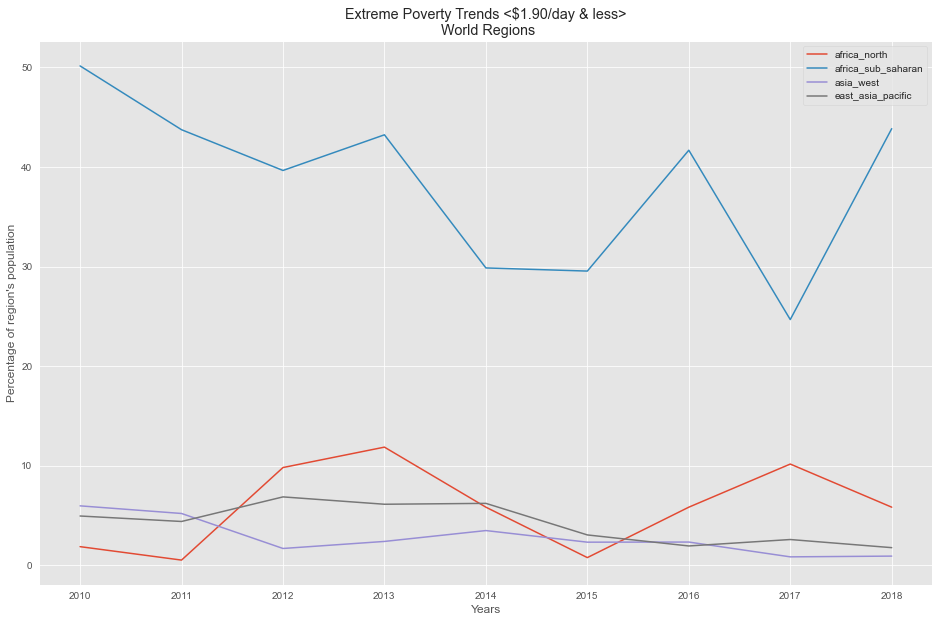

In [60]:
ax = plt.gca()

pov190.plot(x='year', y='africa_north', kind='line', figsize=(10,10), ax=ax)
pov190.plot(x='year', y='africa_sub_saharan', kind='line', figsize=(16,10), ax=ax)
pov190.plot(x='year', y='asia_west', kind='line', figsize=(16,10), ax=ax)
pov190.plot(x='year', y='east_asia_pacific', kind='line', figsize=(16,10), ax=ax)

plt.title("Extreme Poverty Trends <$1.90/day & less>\n World Regions")
plt.ylabel("Percentage of region's population")
plt.xlabel("Years")


In [11]:
pov190.index.name = None
pov190

NameError: name 'pov190' is not defined

Text(0.5, 0, 'Years')

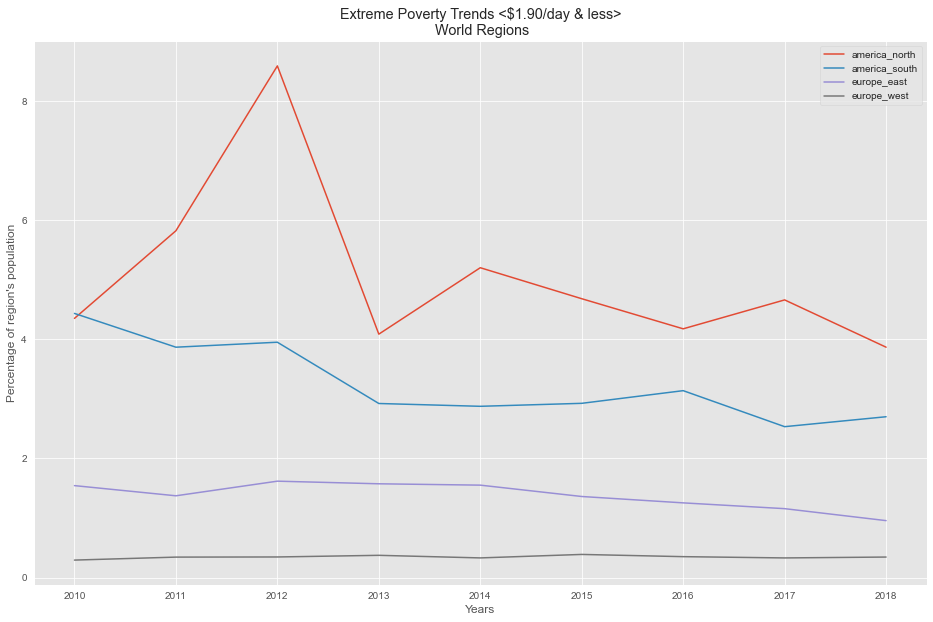

In [62]:
ax = plt.gca()

pov190.plot(x='year', y='america_north', kind='line', figsize=(10,10), ax=ax)
pov190.plot(x='year', y='america_south', kind='line', figsize=(16,10), ax=ax)
pov190.plot(x='year', y='europe_east', kind='line', figsize=(16,10), ax=ax)
pov190.plot(x='year', y='europe_west', kind='line', figsize=(16,10), ax=ax)

plt.title("Extreme Poverty Trends <$1.90/day & less>\n World Regions")
plt.ylabel("Percentage of region's population")
plt.xlabel("Years")
